<a href="https://colab.research.google.com/github/jpshimidt/DataScience/blob/main/%5BBootCamp%5D05_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualização de Dados**
#### Principais bibliotecas de visualização de dados do Python
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [Plotly](https://plotly.com/)
* [Bokeh](http://docs.bokeh.org/en/latest/)
* [Yellowbriack](https://www.scikit-yb.org/en/latest/)

#### Principais bibliotecas para análise estatística
* [Statsmodels](https://www.statsmodels.org/stable/index.html)
* [SciPy](https://scipy.org/)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly
import seaborn as sns
from dbnomics import fetch_series  #module for get data from dbnomics
from pandas_datareader import data  # get finance data
from datetime import datetime
import geobr
import geopandas as gpd

In [ ]:
#!pip install pandas_profiling plotly matplotlib dash geopandas geobr dbnomics yfinance

**Matplotlib Hello World**

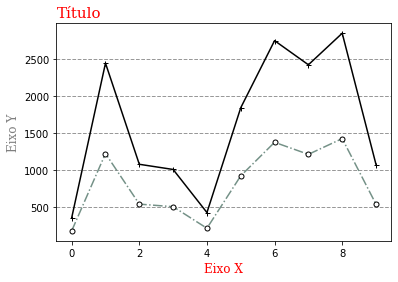

In [ ]:
np.random.seed(7)
# vetor com números inteiros aleatórios entre 1,1500, com 10 amostras

y = np.random.randint(low = 1, high = 1500, size = 10)

# altera as configurações de fonte para o título e os rótulos
font_title = {'family':'serif', 'color':'red', 'size':15}
font_label = {'family':'serif', 'color':'gray', 'size':12}

# insere a primeira linha no plot
plt.plot(y,color = '#749187', marker = 'o', ms = 5, mec = 'k',
        markerfacecolor = 'w', ls = '-.')

# insere a segunda linha no plot
plt.plot(y*2, marker = '+', color = 'k', ms = 5)

# rótulos
plt.xlabel('Eixo X', color = 'red', size = 12, family = 'serif')
plt.ylabel('Eixo Y', fontdict = font_label)
plt.title('Título', fontdict = font_title, loc = 'left')

# gridlines
plt.grid(axis = 'y', color = 'gray',
        linestyle = '--', linewidth = 1,
        alpha = 0.8)
plt.show()

Marcadores: https://matplotlib.org/stable/api/markers_api.html

Cores: https://matplotlib.org/stable/gallery/color/named_colors.html

Estilos de linha: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

Exemplos: https://matplotlib.org/stable/plot_types/index.html


Format strings

fmt = marker|line|color

Sintaxe | Cor
--------|------
'r'     | Vermelho
'g'     | Verde
'b'     | Azul
'c'     | Ciano
'm'     | Magenta
'y'     | Amarelo
'k'     | Preto
'w'     | Branco

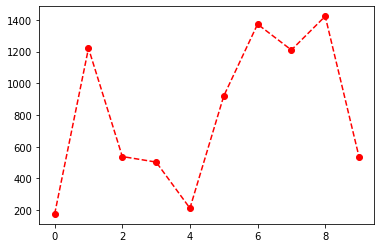

In [ ]:
# exemplo format strings
plt.plot(y, 'o--k', c = 'r')

**Propriedades da linha e marcadores**

Propriedades | Exemplos    | Descrição
-------------|-------------|--------------
color   ou c     | Podemos usar strings como 'red', código rgb ou ainda "#001122"| Especificação de cor
alpha        | Número float entre 0.0 e 1 | Especificação da transparência
linewidth  ou lw  | Número float | Largura da linha 
linestyle ou ls    | '-' ('solid'), '--' ('dashed'), ':' ('dotted'), '-.' ('dashdot') | Estilo da linha
marker       | '+' (cruz), 'o' (círculo), 's' (quadrado) | Especificação do marcador
ms ou markersize | plt.plot(y, ms = 20) | Tamanho do marcador
markeredgecolor ou mec | plt.plot(y, mec = 'r') | Cor da linha marcador
markerfacecolor ou mfc | plt.plot(y, mfc = 'r') | Cor do marcador

**Estilos**

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

**Subplots**

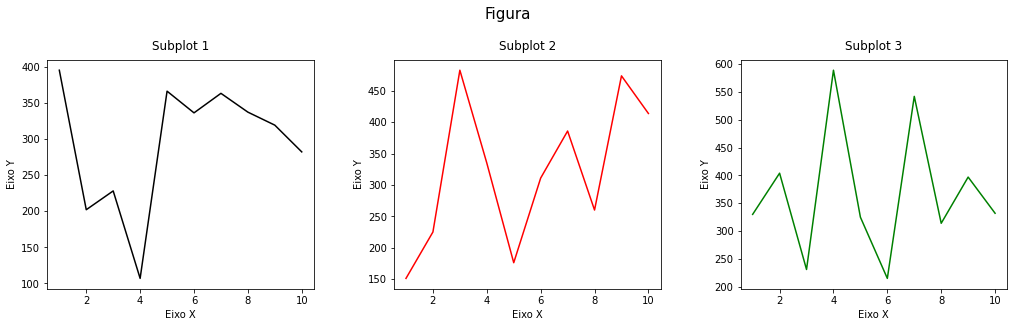

In [ ]:
np.random.seed(6)
x = np.arange(1, 11)
y1 = np.random.randint(1, 400, 10)
y2 = np.random.randint(150, 500, 10)
y3 = np.random.randint(200, 600, 10)
plt.figure(figsize = (15, 5))
plt.suptitle('Figura', fontsize = 15)

plt.subplot(1, 3, 1)
plt.plot(x, y1, color = 'k')
plt.title('Subplot 1', pad = 10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.subplot(1, 3, 2)
plt.plot(x, y2, color = 'r')
plt.title('Subplot 2', pad = 10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.subplot(1, 3, 3)
plt.plot(x, y3, color = 'g')
plt.title('Subplot 3', pad = 10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.tight_layout(pad = 4)
plt.show()

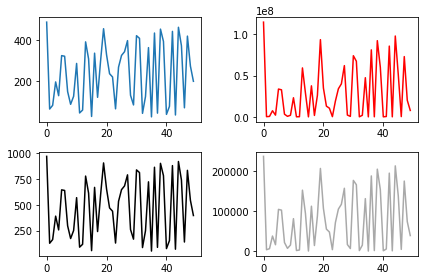

In [ ]:
fig, ax = plt.subplots(2, 2)

y = np.random.randint(1, 500, 50)
                       
ax[0,0].plot(y)

ax[0, 1].plot(y**3, color = 'red')

ax[1, 0].plot(y*2, color = 'black')

ax[1, 1].plot(y**2, color = 'darkgray')

fig.tight_layout()

***

Agora vamos exemplificar alguns gráficos para verificar questões de natureza estatística em relação ao dados. Para tanto usaremos as principais bibliotecas do Python.

Vamos criar o DataFrame:

In [ ]:
np.random.seed(8)
# tamanho da amostra
n = 40
# dicionário de dados
data = {
    'Id': np.arange(1, n+1),
    'Score': np.random.randint(50, 150, n),
    'Sexo': np.random.choice(['Masculino', 'Feminino'], size = n),
    'Idade': np.random.randint(18, 30, n)
       }
# cria o data frame
df = pd.DataFrame(data)

# adiciona ruído aos dados
# coluna Score
df.iloc[np.random.randint(1,30, 10), 1] = np.random.randint(350, 450, 10)
# coluna Idade
df.iloc[np.random.randint(1, 30, 10), 3] = np.random.randint(50, 80, 10)

In [ ]:
df.head()

Id  Score       Sexo  Idade
0   1    117  Masculino     27
1   2    134   Feminino     79
2   3     55  Masculino     79
3   4    382   Feminino     27
4   5     58   Feminino     20

**Boxplot**

Vamos ver na prática como implementar um boxplot de diferentes formas usando Python.

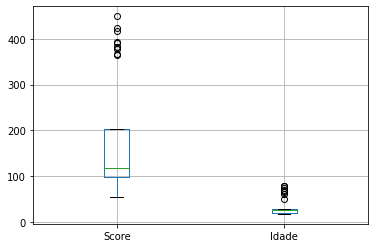

In [ ]:
df.drop(columns = 'Id').boxplot();

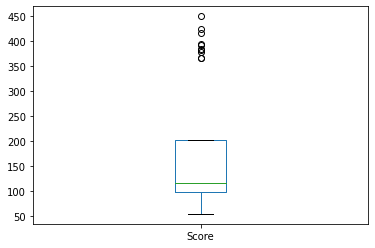

In [ ]:
df.Score.plot(kind = 'box');

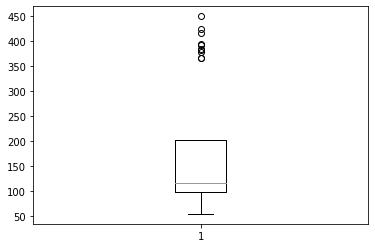

In [ ]:
plt.boxplot(df['Score']);

Agora vamos usar o `Seaborn`:

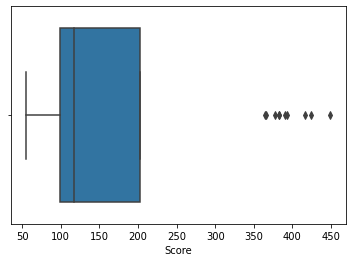

In [ ]:
sns.boxplot(data = df, x = 'Score');

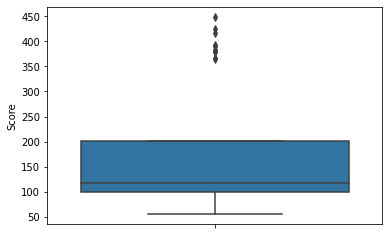

In [ ]:
sns.boxplot(data = df, y = 'Score');

Agora vamos usar o `Plotly`:

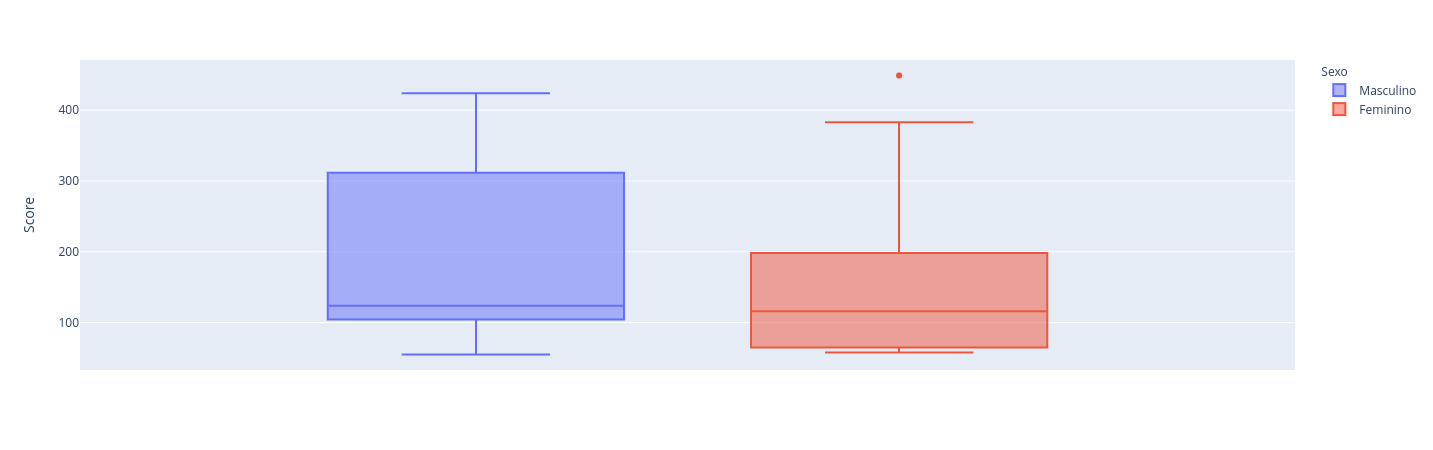

In [ ]:
px.box(data_frame = df, y = 'Score', color = 'Sexo')

Python é incrível? Óbvio que sim, ora !

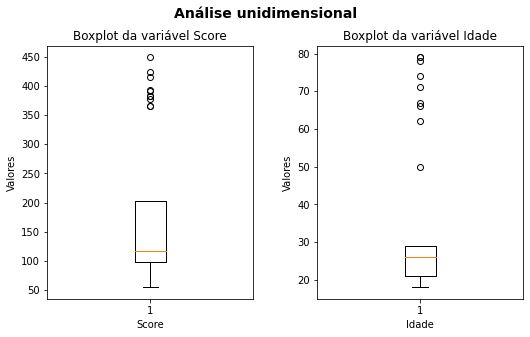

In [ ]:
# cria a figura
fig, ax = plt.subplots(1, 2, figsize = (8, 5))
# insere o boxplot nos eixos criados
ax[0].boxplot(df.Score)
ax[1].boxplot(df.Idade)
# ajusta os rótulos dos eixos
ax[0].set(xlabel = 'Score', ylabel = 'Valores', title = 'Boxplot da variável Score')
ax[1].set(xlabel = 'Idade', ylabel = 'Valores', title = 'Boxplot da variável Idade')
# título da figura
fig.suptitle('Análise unidimensional', size = 14, fontweight = 'bold')
fig.tight_layout(pad = 3)

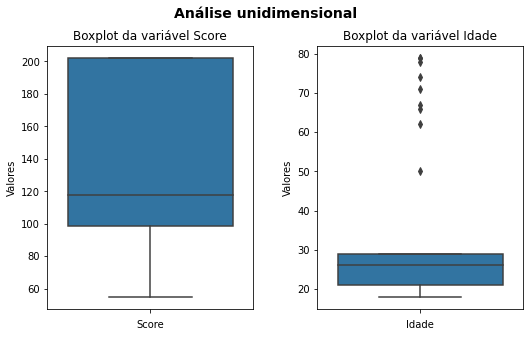

In [ ]:
# cria a figura
fig, ax = plt.subplots(1, 2, figsize = (8, 5))
# insere o boxplot nos eixos criados
# showfliers
sns.boxplot(data = df, y = 'Score', ax = ax[0], showfliers = False)
sns.boxplot(data = df , y = 'Idade', ax = ax[1])
# ajusta os rótulos dos eixos
ax[0].set(xlabel = 'Score', ylabel = 'Valores', title = 'Boxplot da variável Score')
ax[1].set(xlabel = 'Idade', ylabel = 'Valores', title = 'Boxplot da variável Idade')
# título da figura
fig.suptitle('Análise unidimensional', size = 14, fontweight = 'bold')
fig.tight_layout(pad = 3)

**Conclusão:** existem outliers nestes dados? O que fazer ? Qual a importância desta análise ?

**Histograma**

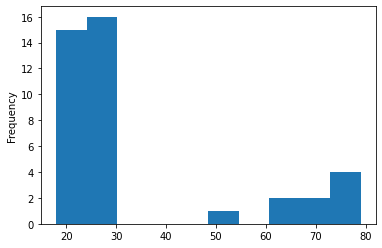

In [ ]:
df.Idade.plot(kind = 'hist');

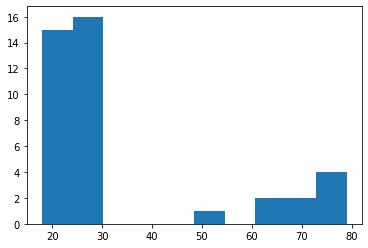

In [ ]:
plt.hist(x = df['Idade']);

Agora vamos usar o `Seaborn`:

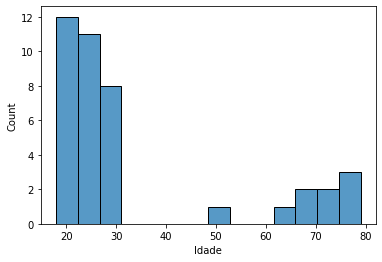

In [ ]:
sns.histplot(data = df, x = 'Idade');

Agora vamos usar o `Plotly`:

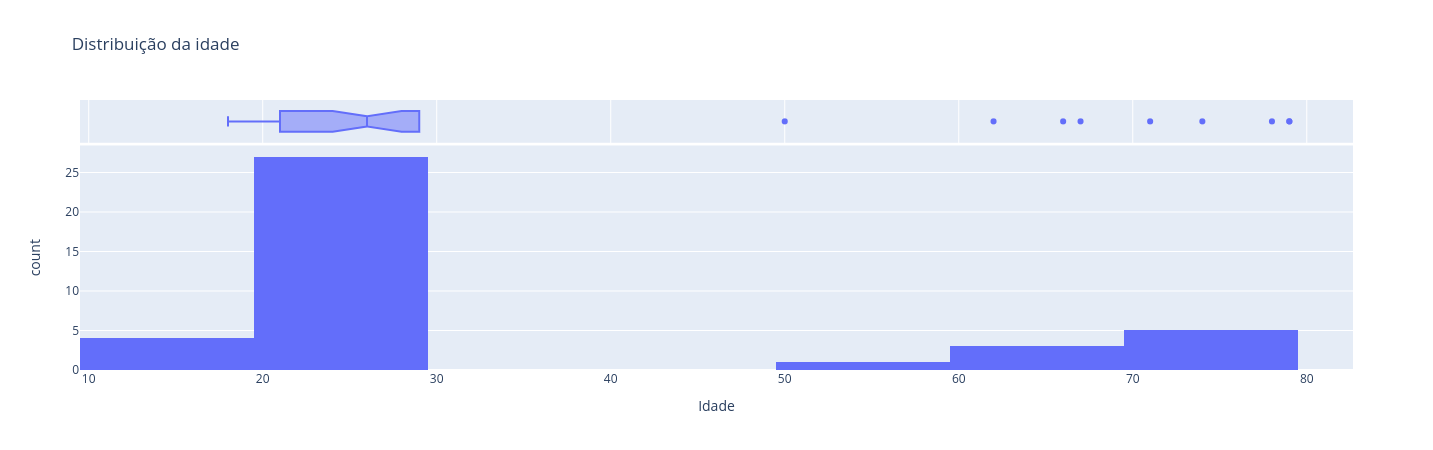

In [ ]:
px.histogram(data_frame = df, x = 'Idade',
             title = 'Distribuição da idade',
             marginal = 'box'
            )

***
Desafio 1: no histograma a seguir insira linhas para representar a média e a mediana da distribuição.




In [ ]:
#df = pd.DataFrame({'X': np.random.normal(60, 1.5, size = 10_000)})
#plt.hist(df['X']);

***

**Density**

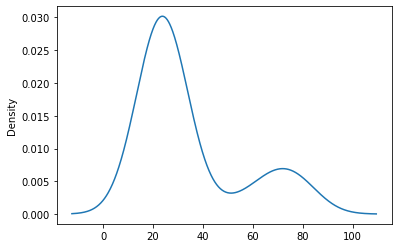

In [ ]:
df.Idade.plot(kind = 'kde');

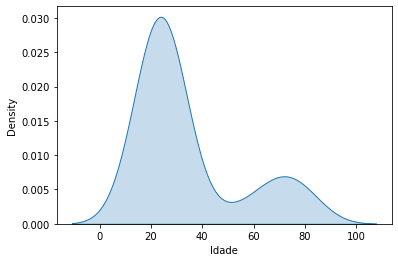

In [ ]:
sns.kdeplot(data = df, x = 'Idade', shade = True);

/home/lucas/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



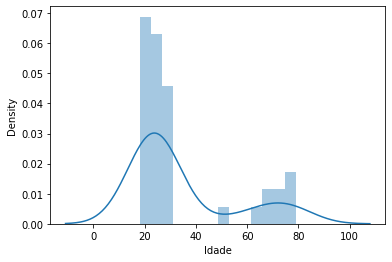

In [ ]:
sns.distplot(df['Idade']);

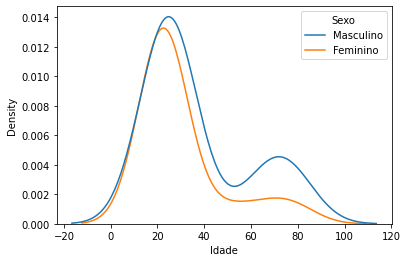

In [ ]:
sns.kdeplot(data = df, x = 'Idade', hue = 'Sexo')

Agora vamos montar um painel:

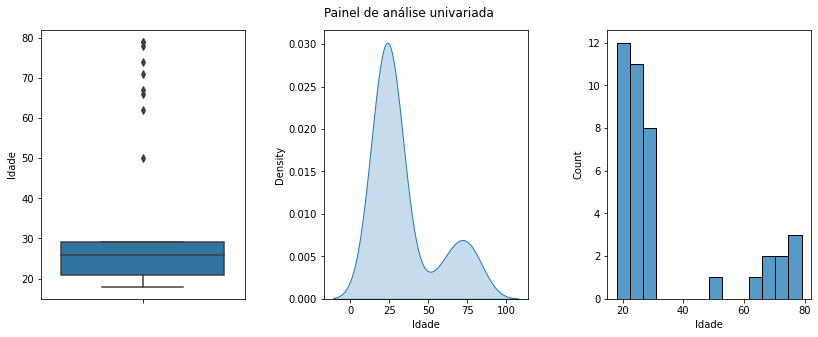

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (12, 5))

# boxplot
sns.boxplot(data = df, y = 'Idade', ax = ax[0])

# kdeplot
sns.kdeplot(data = df, x = 'Idade', shade = True, ax = ax[1])

# histograma
sns.histplot(data = df, x = 'Idade', ax = ax[2])

fig.tight_layout(pad = 3)
fig.suptitle('Painel de análise univariada');

***
Desafio 2: pense em uma forma de encapsular o código do painel de análise univariada em uma função, para tornar o código mais escalável.

Desafio 3: faça uma análise univariada análoga para os dados do ENEM, escolha alguma variável para tal.

***

**Análise bivariada**

Vamos considerar agora o caso de considerar duas variáveis para análise, neste caso podemos contar com o scatterplot, ou no caso de adicionar uma terceira dimensão aos dados o Bubble Plot.

Vamos considerar outros conjunto de dados agora.

In [ ]:
df = pd.read_csv('data/data.csv')

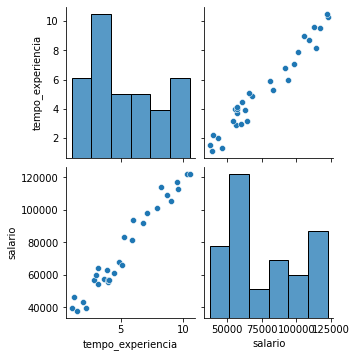

In [ ]:
sns.pairplot(df);

In [ ]:
# correlação linear de Pearson
df.corr()

tempo_experiencia   salario
tempo_experiencia           1.000000  0.978242
salario                     0.978242  1.000000

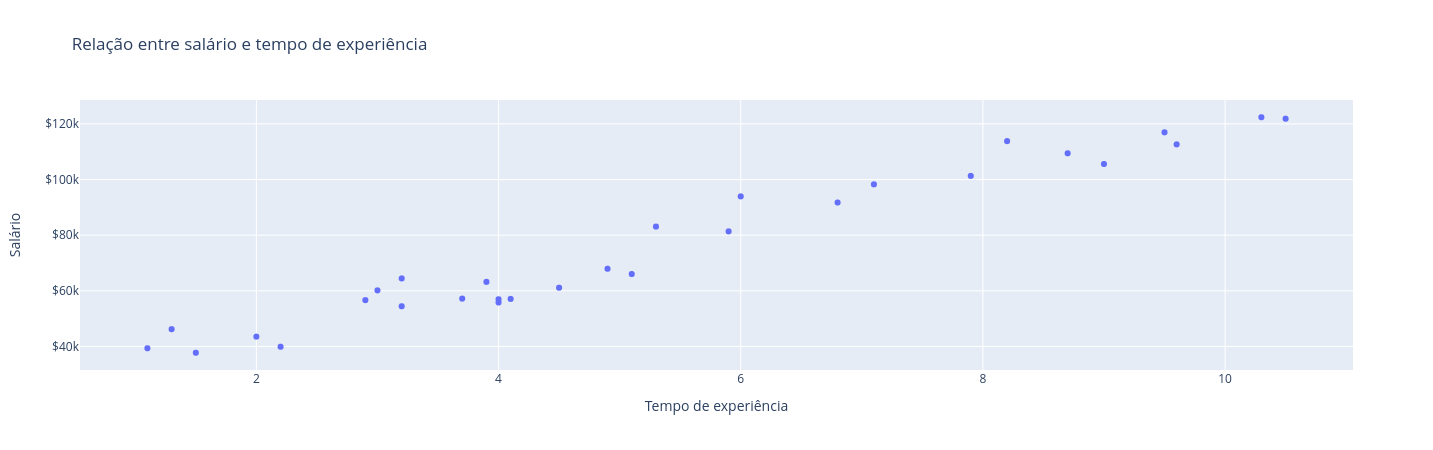

In [ ]:
figure = go.Figure(data = go.Scatter(x = df['tempo_experiencia'], 
                                     y = df['salario'],
                                     mode = 'markers'
                                    ),
                   layout = go.Layout(xaxis = dict(title = 'Tempo de experiência'),
                                      yaxis = dict(title = 'Salário'),
                                      title = 'Relação entre salário e tempo de experiência'
                                     )
                  )

figure.update_yaxes(tickprefix = '$')
figure

Vamos considerar agora dados de consumo de cerveja:

In [ ]:
df = pd.read_csv('data/Consumo_cerveja.csv')

Vamos remover linhas duplicadas:

In [ ]:
df.drop_duplicates(inplace = True, keep = False)

Agora precisamos verificar se há missing values, concluimos que não há dados ausentes nesta base.

In [ ]:
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

Vamos checkar os dtypes de cada coluna:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [ ]:
# para cada coluna object converte para o dtype numérico
# note que antes substituímos ',' por '.'
for column in df.select_dtypes(include = object).columns[1:]:
    df[column] = pd.to_numeric(df[column].str.replace(',','.'))

In [ ]:
# converte a coluna 'Data' para o formato datetime do Pandas
df['Data'] = pd.to_datetime(df['Data'], format = '%Y-%m-%d')

In [ ]:
# renomeia as colunas do dataset
df.rename(
    columns = {
        'Temperatura Media (C)': 'Temperatura_mean',
        'Temperatura Maxima (C)': 'Temperatura_Max',
        'Temperatura Minima (C)': 'Temperatura_min',
        'Precipitacao (mm)': 'Precipitacao',
        'Final de Semana': 'Final_semana',
        'Consumo de cerveja (litros)': 'Consumo_cerveja'
    },
    inplace = True
)

In [ ]:
# obtém estatísticas descritivas
df.describe()

Temperatura_mean  Temperatura_min  Temperatura_Max  Precipitacao  \
count        365.000000       365.000000       365.000000    365.000000   
mean          21.226356        17.461370        26.611507      5.196712   
std            3.180108         2.826185         4.317366     12.417844   
min           12.900000        10.600000        14.500000      0.000000   
25%           19.020000        15.300000        23.800000      0.000000   
50%           21.380000        17.900000        26.900000      0.000000   
75%           23.280000        19.600000        29.400000      3.200000   
max           28.860000        24.500000        36.500000     94.800000   

       Final_semana  Consumo_cerveja  
count    365.000000       365.000000  
mean       0.284932        25.401367  
std        0.452001         4.399143  
min        0.000000        14.343000  
25%        0.000000        22.008000  
50%        0.000000        24.867000  
75%        1.000000        28.631000  
max        1.000000        37.937000

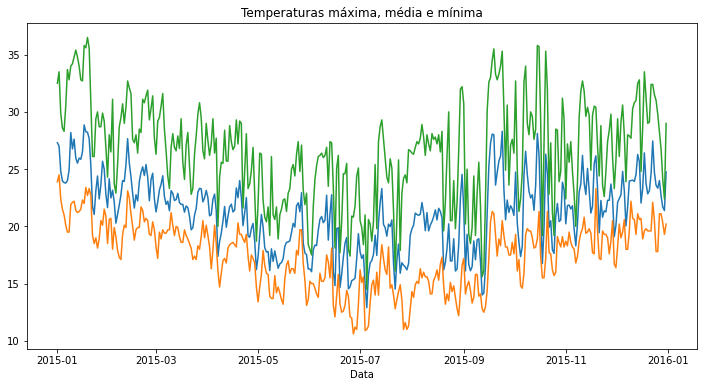

In [ ]:
# seleciona colunas de temperatura
cols_temperatura = df.iloc[:,1:4]

# cria a figura
fig, ax = plt.subplots(figsize = (12, 6))
# itera na lista de colunas referente às temperaturas e cria o plot
for column in cols_temperatura:
    ax.plot(df['Data'], df[column])
ax.set(title = 'Temperaturas máxima, média e mínima',
       xlabel = 'Data'
      );

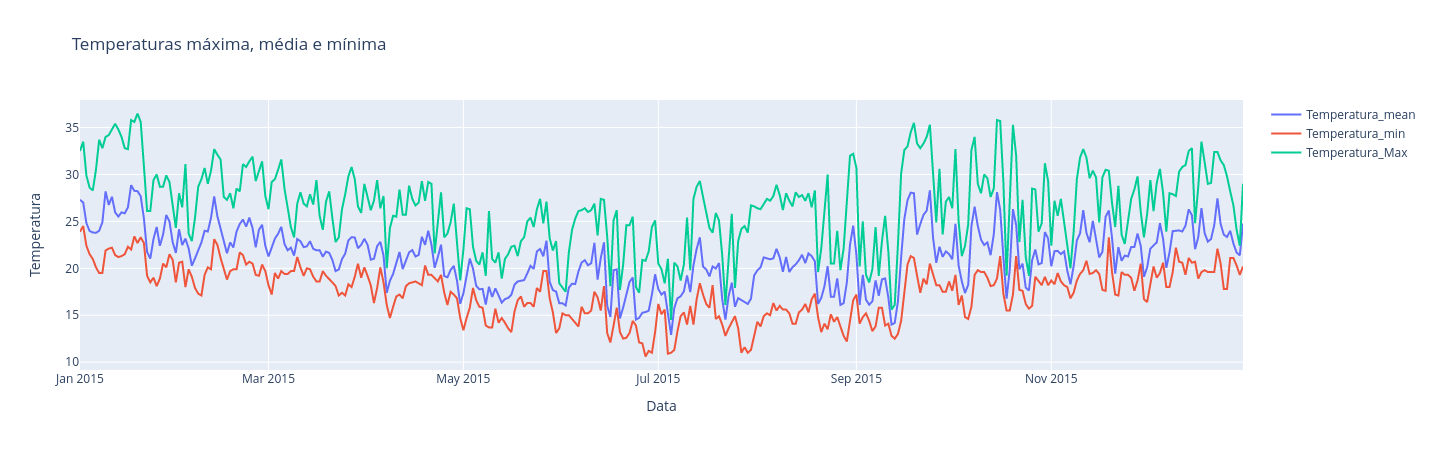

In [ ]:
traces = list()
for column in cols_temperatura:
    trace = go.Scatter(
        x =  df['Data'],
        y = df[column],
        name = column,
        mode = 'lines'
    )
    traces.append(trace)
    
layout = go.Layout(
    xaxis = dict(title = 'Data'),
    yaxis = dict(title = 'Temperatura'),
    title = 'Temperaturas máxima, média e mínima'
)

fig = go.Figure(data = traces, layout = layout)
fig

In [ ]:
def line_plot(xaxis, yaxis, data_frame, title = '', 
              figsize = (12, 6),
              xlabel = '',
              ylabel = '',
              line_color = 'k'
             ):
    """
    Documente esta função.
    """
    fig, ax = plt.subplots(figsize = figsize)
    ax.plot(data_frame[xaxis], data_frame[yaxis],
            color = line_color
           )
    ax.set(title = title, xlabel = xlabel, ylabel = ylabel)

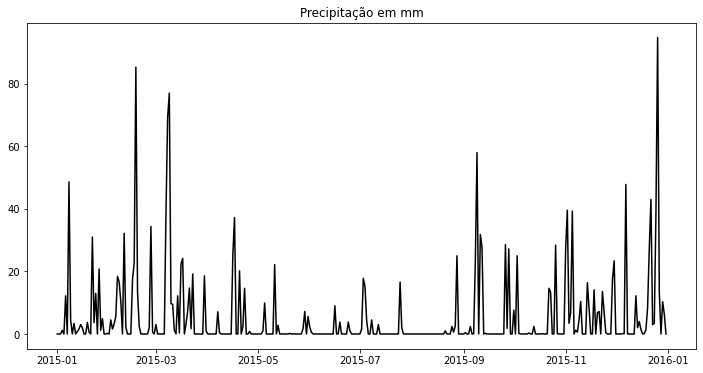

In [ ]:
line_plot('Data', 'Precipitacao', df, 'Precipitação em mm')

Vamos agora entender o consumo de cerveja:

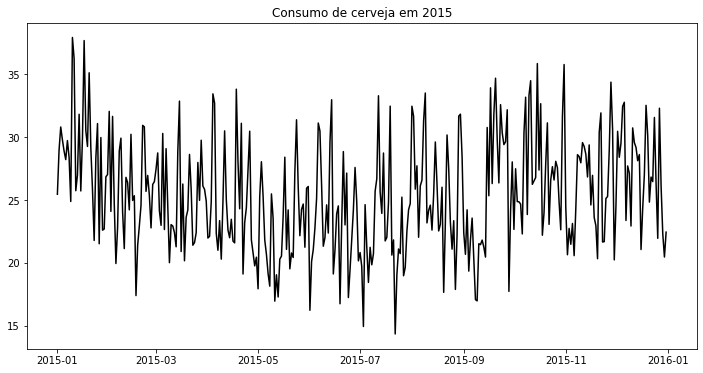

In [ ]:
line_plot('Data', 'Consumo_cerveja', df, title = 'Consumo de cerveja em 2015')

In [ ]:
corr = df.corr()

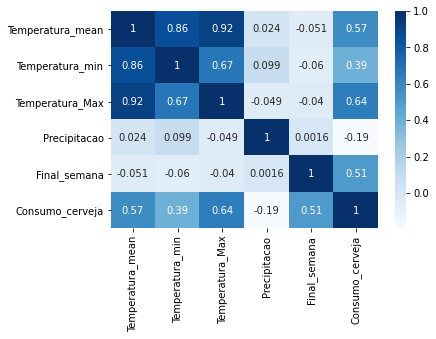

In [ ]:
sns.heatmap(
    corr,
    annot = True,
    cmap = 'Blues');

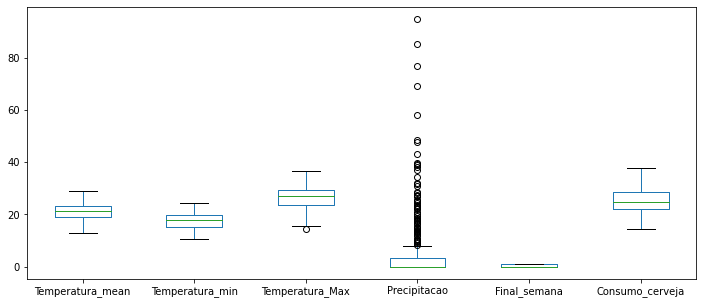

In [ ]:
df.iloc[:,1:].plot(kind = 'box', figsize = (12, 5));

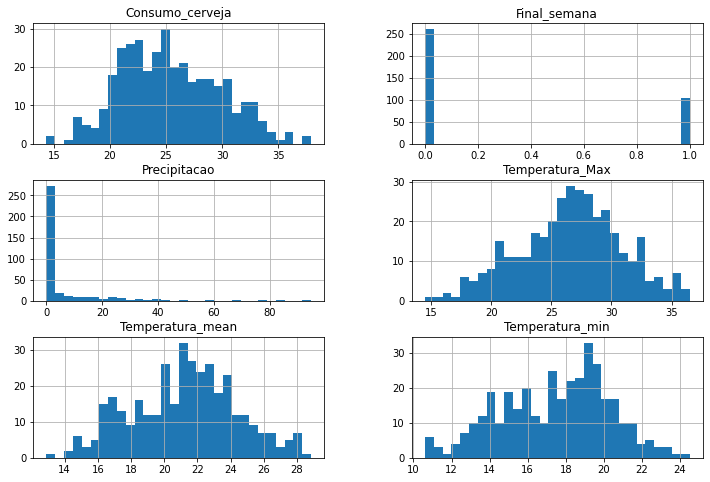

In [ ]:
df.iloc[:,1:].hist(figsize = (12, 8), bins = 30);

### Visualização de Dados para Economia/Finanças

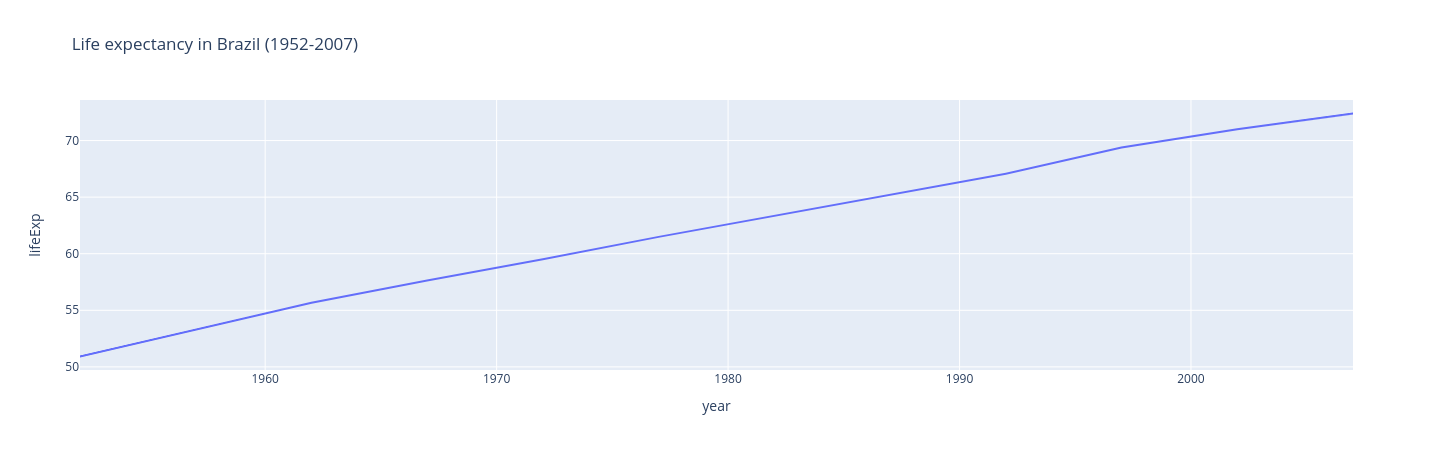

In [ ]:
#get data of life expectancy and GDP for Brazil
df = px.data.gapminder().query('country == "Brazil"')
title = 'Life expectancy in Brazil (1952-2007)'

fig = px.line(df, x = 'year', y = 'lifeExp', title = title)
fig.show()

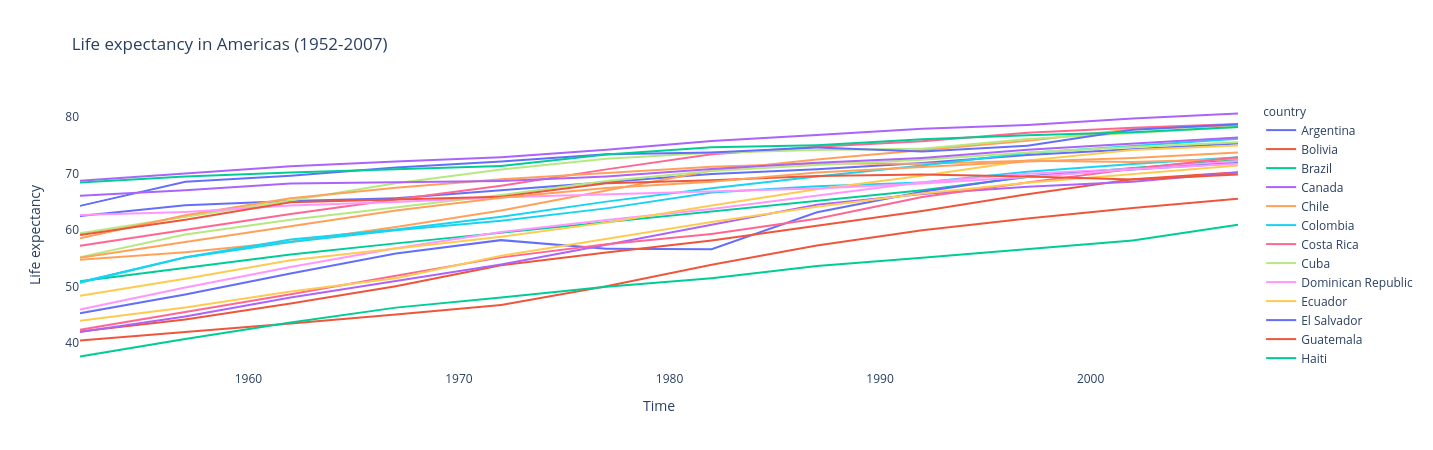

In [ ]:
#get data of life expectancy for Americas
df = px.data.gapminder().query('continent == "Americas"')

title = 'Life expectancy in Americas (1952-2007)'
fig = px.line(df, x = 'year', y = 'lifeExp', color = 'country', 
              title = title)

fig.update_layout(xaxis = dict(title = 'Time'),  #set x label
                  yaxis = dict(title = 'Life expectancy'),  #set y label
                  plot_bgcolor="white"  #set background color
                 )
fig.show()

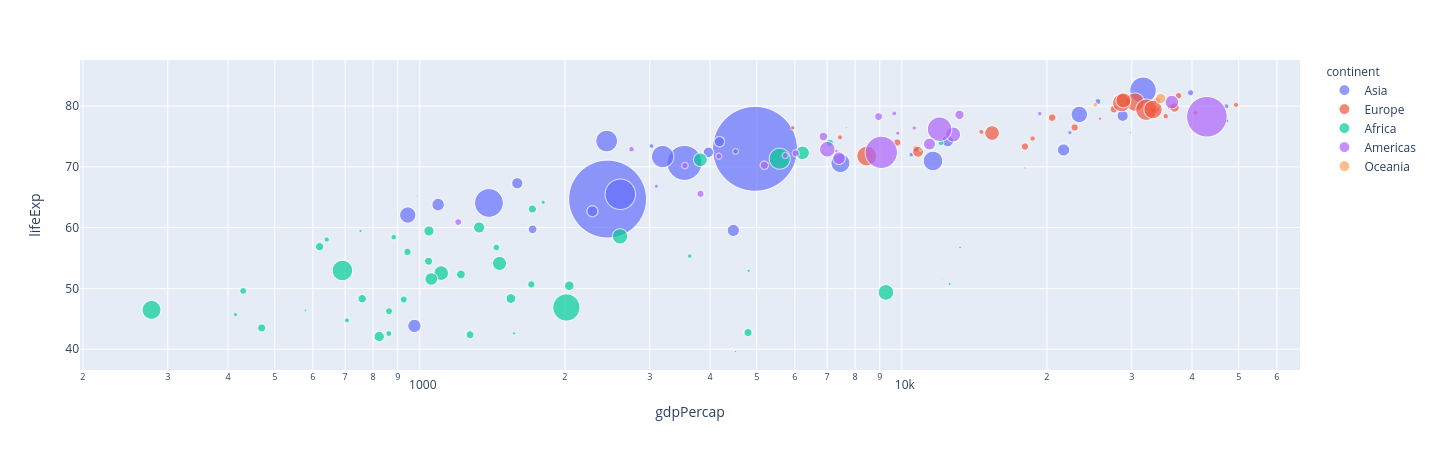

In [ ]:
df = px.data.gapminder().query('year==2007')

fig = px.scatter(df, x = "gdpPercap", y = "lifeExp", size = 'pop',
                 log_x = True, color = 'continent', size_max = 60,
                 hover_name = 'country'
                )
fig.show()

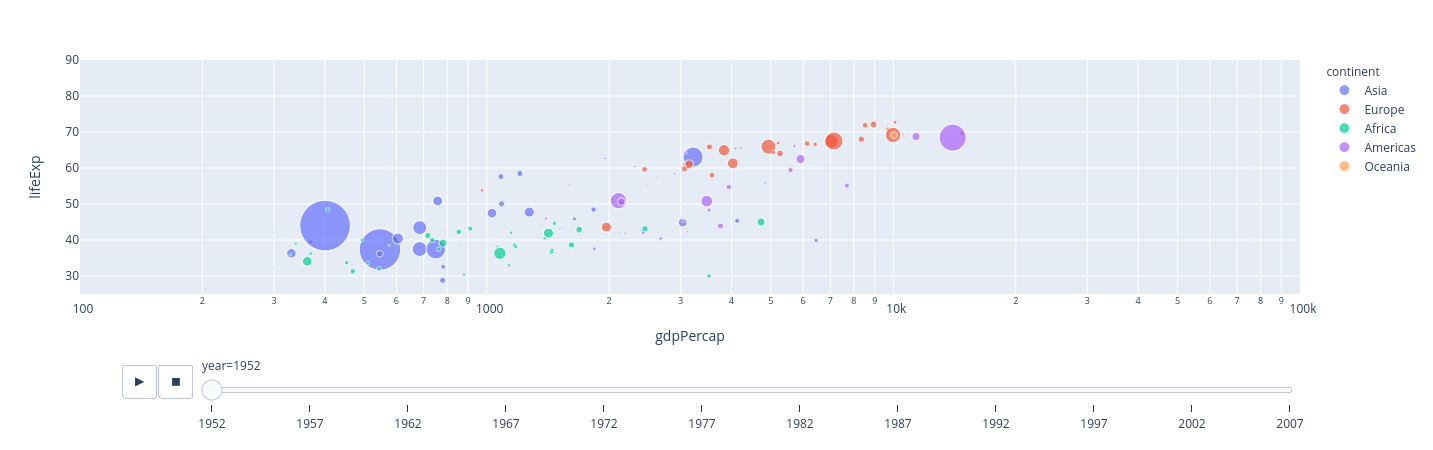

In [ ]:
#animated figure 
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame = "year", 
           animation_group = "country",
           size = "pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
data = fetch_series([
    'FAO/TP/10.21.5922',  #Total Merchandise Trade – Export Value for Brazil,
    'FAO/TP/10.21.5622',  #Total Merchandise Trade – Import Value for Brazil
    ])


#drop irrelevant columns
data.drop(columns = data.columns.values[:7], inplace = True)

#set index of dataframe
data.set_index('period', inplace = True)

#build the export, import, and trade balance series from our data
export_br = data.query('Element == "Export Value"')['value']
import_br = data.query('Element == "Import Value"')['value']
trade_balance = export_br-import_br

#final data
df = pd.concat([export_br, import_br, trade_balance], axis = 1)
df.columns = ['Export', 'Import', 'Trade Balance']

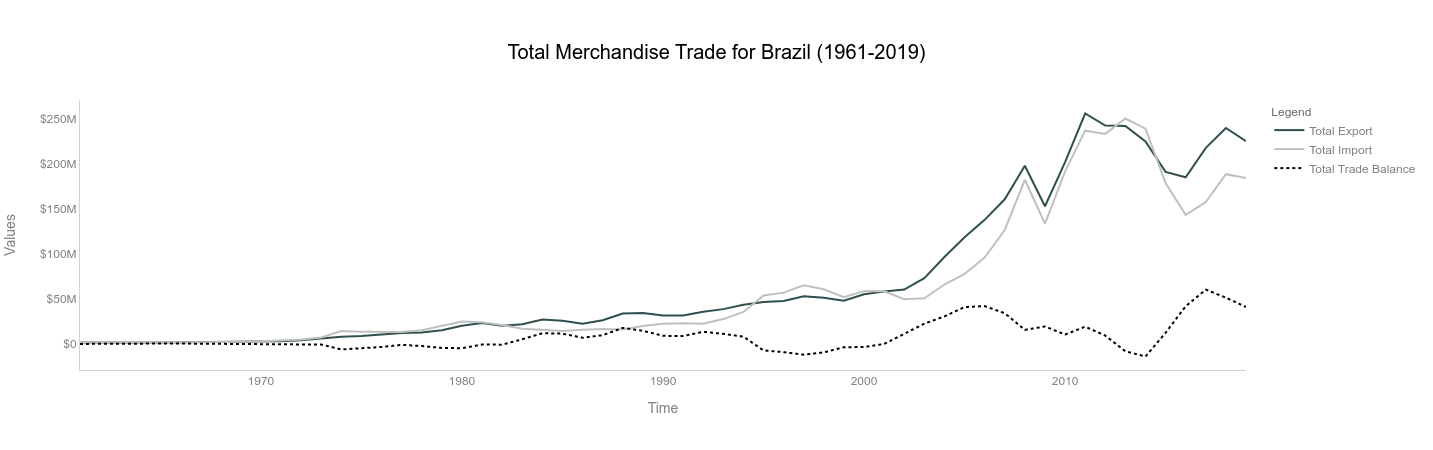

In [ ]:
colors = ['#2F4F4F', '#C0C0C0', '#000000']
dash = ['solid', 'solid', 'dot']

#iterate over df to create traces
traces = list()
for index, column in enumerate(df.columns):
    trace = go.Scatter(
        x = df.index,
        y = df[column],
        name = f'Total {column}',
        line = dict(color = colors[index],
                    dash = dash[index]
                   )
    )
    traces.append(trace)
    
fig = go.Figure(traces)


fig.update_layout(
    #title = 'Total Merchandise Trade for Brazil (1961-2019)',
    title_font_size = 20,
    font_family = 'Arial',
    font_color = 'grey',
    title_font_color = 'black',
    plot_bgcolor = 'white',
    legend_title = 'Legend',
    legend_title_font_color = 'dimgrey',
    xaxis = dict(title = 'Time'),
    yaxis = dict(title = 'Values'),
    title = dict(
        text = 'Total Merchandise Trade for Brazil (1961-2019)',
        x = 0.5,
        y = 0.9,
        xanchor = 'center',
        yanchor = 'top')
    )

fig.update_yaxes(tickprefix="$")

#altera a configuração das linhas vertical e horizontal dos subplots
fig.update_xaxes(showline=True, linewidth = 1, linecolor='lightgrey')
fig.update_yaxes(showline=True, linewidth = 1, linecolor='lightgrey')

fig.show()

In [ ]:
#importa o dataset stocks - com closing prices para algumas empresas
data = px.data.stocks()

In [ ]:
from plotly.subplots import make_subplots  #importa a função para fazer subplots

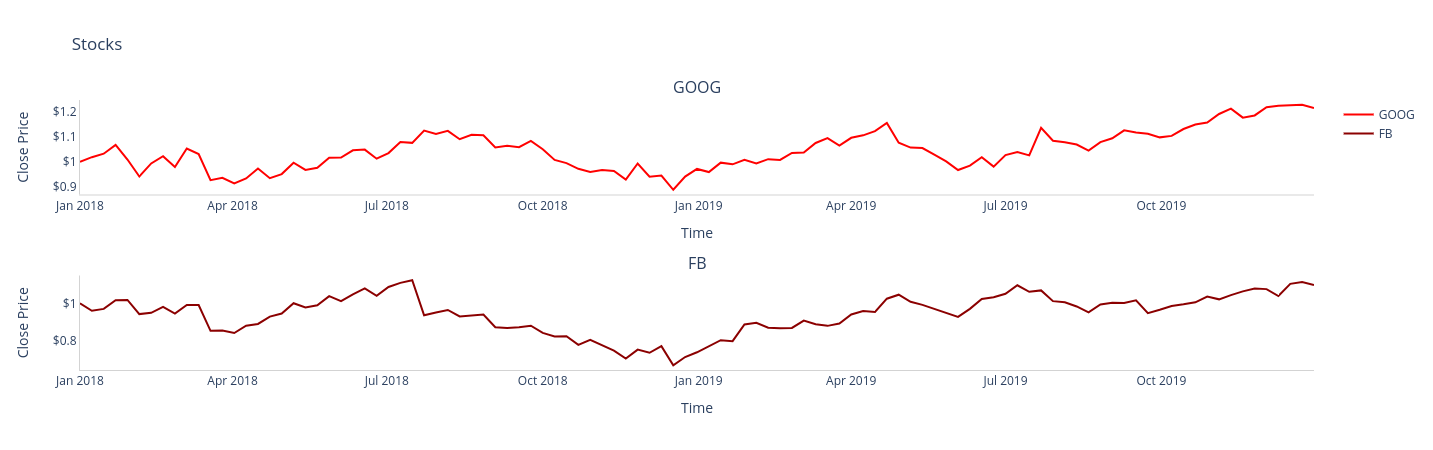

In [ ]:
#cria a configuração dos subplots com 2 linhas e 1 coluna
#o argumento subplot_titles adiciona um título específico para cada subplot
#vertical_spacing modifica o espaçamento vertical
fig = make_subplots(rows = 2, cols = 1, subplot_titles = ['GOOG', 'FB'],
                   vertical_spacing = 0.3)

#adiciona o primeiro trace, que corresponde as ações GOOG
#ao final precisamos especificar a linha, coluna correspondente
fig.add_trace(go.Scatter(
    x = data['date'],
    y = data['GOOG'],
    mode = 'lines',
    name = 'GOOG',
    line = dict(color = 'red')
), row = 1, col = 1)

#adiciona o segundo trace
fig.add_trace(go.Scatter(
    x = data['date'],
    y = data['FB'],
    mode = 'lines',
    name = 'FB',
    line = dict(color = 'darkred')
), row = 2, col = 1)


#atualiza o título do eixo x para o primeiro subplot
#o argumento showgrid permite alterar as gridlines do eixo correspondente
fig.update_xaxes(title = 'Time', row = 1, col = 1, showgrid = False)

#atualiza o título do eixo x para o segundo subplot
fig.update_xaxes(title = 'Time', row = 2, col = 1, showgrid = False)


#atualiza o título do eixo y para os subplots correspondentes
#neste caso o showgrid=False irá remover as gridlines do eixo y
fig.update_yaxes(title = 'Close Price', row = 1, col = 1, showgrid = False)
fig.update_yaxes(title = 'Close Price', row = 2, col = 1, showgrid = False)

#muda o título do layout e altera a cor do background para white
fig.update_layout(title = 'Stocks', plot_bgcolor = 'white')

#insere o tick monetário
fig.update_yaxes(tickprefix="$")

#altera a configuração das linhas vertical e horizontal dos subplots
fig.update_xaxes(showline=True, linewidth = 1, linecolor='lightgrey')
fig.update_yaxes(showline=True, linewidth = 1, linecolor='lightgrey')

fig.show()

In [ ]:
df = pd.read_csv('data/FAOSTAT_data_6-14-2021.csv')


In [ ]:
#remove colunas que não serão utilizadas
cols = ['Domain Code', 
        'Domain', 
        'Area Code (FAO)',
        'Item Code (FAO)',
        'Flag', 
        'Flag Description'
       ]

df.drop(columns = cols, inplace = True)

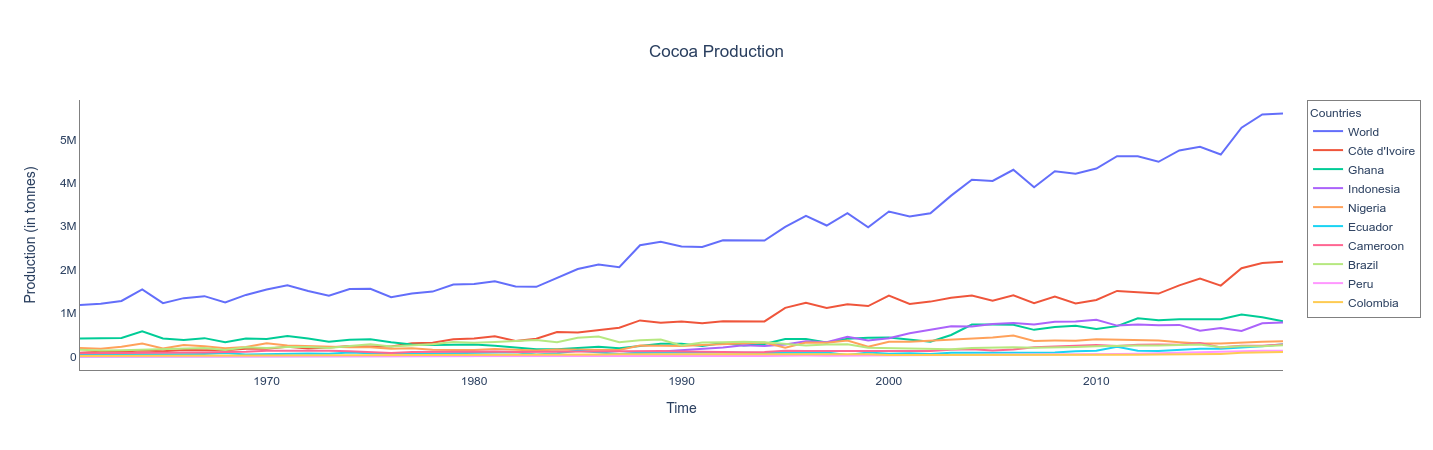

In [ ]:
#este gráfico plota a série temporal baseada nas opções da coluna 'Element'
value = 'Production'
#filtra o dataframe com base na opção selecionada e pivot a tabela
data = (df[df['Element'] == value]
        .pivot_table(index = 'Year', values = 'Value', columns = ['Area']))

#seleciona o top 10 para o último ano
countries = data.loc[2019].sort_values(ascending = False)[:10].index

fig = go.Figure()

#adiciona as linhas na figura
for country in countries:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[country].values,
        name = country
    ))


fig.update_layout(title = dict(text = f'Cocoa {value}',
                               x = 0.5,
                               y = 0.9
                              ),
                  plot_bgcolor = 'white',
                  font_family = 'Arial',
                  legend = dict(title = 'Countries',
                                bordercolor = 'grey',
                                borderwidth = 1
                               ),
                  xaxis = dict(title = 'Time'),
                  yaxis = dict(title = 'Production (in tonnes)')
                 ) 

#adiciona linha nos eixos x e y
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey')

fig.show()


In [ ]:
import yfinance as yf

In [ ]:
petr3 = yf.Ticker('PETR3.SA')

In [ ]:
data = petr3.history(period  = 'max')

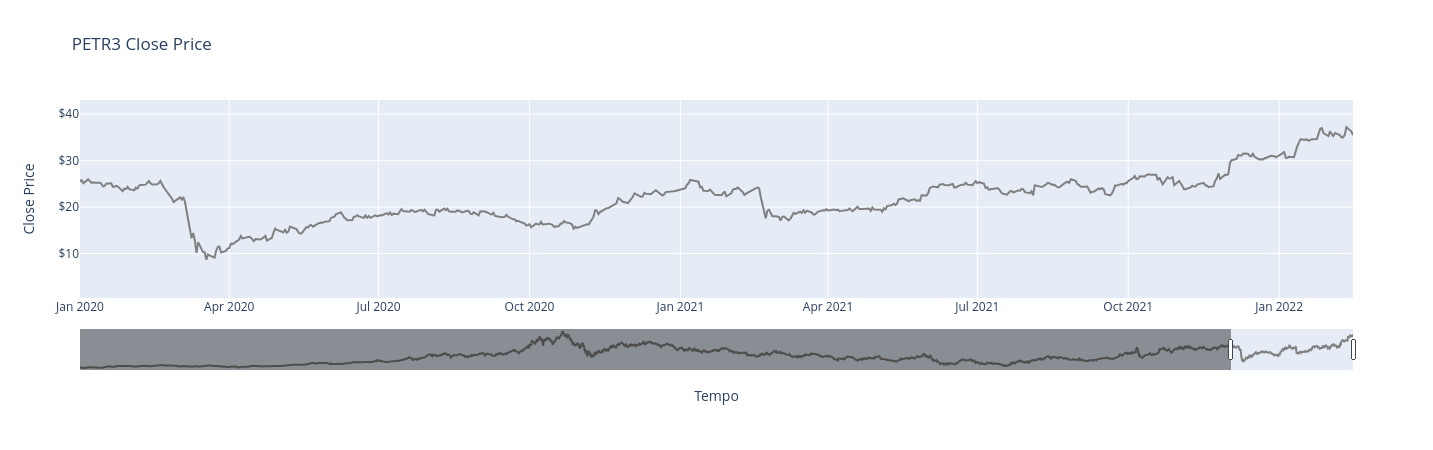

In [ ]:
linha = go.Scatter(
    x = data.index,
    y = data['Close'],
    name = 'PETR3 Close Price',
    mode = 'lines',
    line = dict(color = 'grey')
)

layout = go.Layout(
    title = 'PETR3 Close Price',
    xaxis = dict(title = 'Tempo'),
    yaxis = dict(title = 'Close Price'),
    xaxis_range = ['2020-01-01', datetime.now().strftime('%Y-%m-%d')]
)

fig = go.Figure(linha, layout)
fig.update_yaxes(tickprefix="$")

fig.update_xaxes(rangeslider_visible = True)

fig.show()

**Mapas**

In [ ]:
# pega as geometrias para os estados brasileiros
states = geobr.read_state(year=2019)


Vamos ver o resultado das coordenadas dos estados brasileiros:

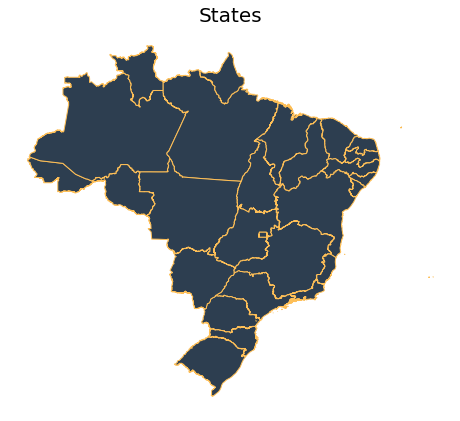

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

states.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("States", fontsize=20)
ax.axis("off");

Agora vamos pegar uma base externa para fazer um mapa da Expectativa de Vida nos estados brasileiros:

In [ ]:
data_url = "https://raw.githubusercontent.com/ipeaGIT/geobr/master/r-package/inst/extdata/br_states_lifexpect2017.csv"

df = pd.read_csv(data_url, index_col=0)

states["name_state"] = states["name_state"].str.lower()
df["uf"] = df["uf"].str.lower()

# join the databases
states = states.merge(df, how="left", left_on="name_state", right_on="uf")

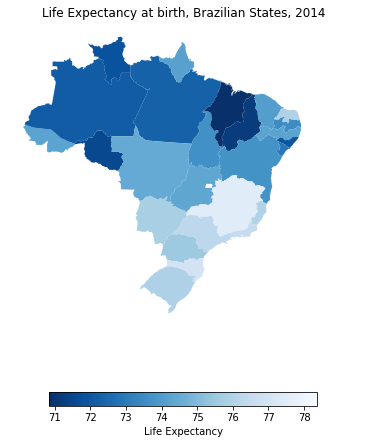

In [ ]:
plt.rcParams.update({"font.size": 10})

fig, ax = plt.subplots(figsize=(8, 8))

states.plot(
    column="ESPVIDA2017",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Life Expectancy",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off");

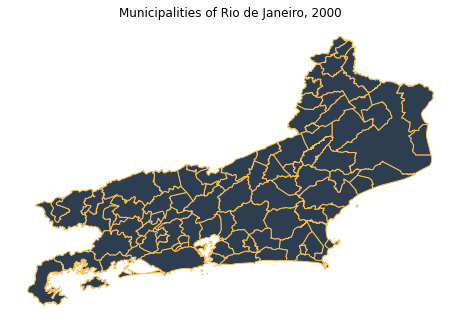

In [ ]:
# Download all municipalities of Rio
all_muni = geobr.read_municipality(code_muni="RJ", year=2010)
# plot
fig, ax = plt.subplots(figsize=(8, 8))

all_muni.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("Municipalities of Rio de Janeiro, 2000", fontsize=12)
ax.axis("off");

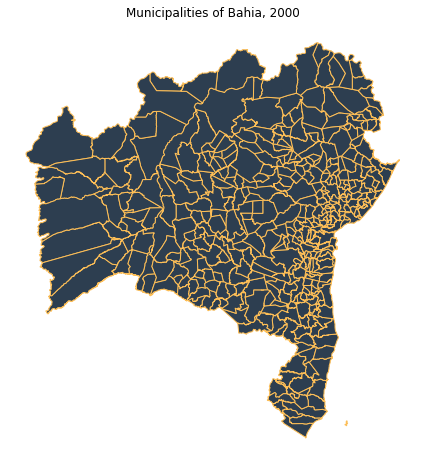

In [ ]:
# Download all municipalities of Rio
all_muni = geobr.read_municipality(code_muni="BA", year=2010)
# plot
fig, ax = plt.subplots(figsize=(8, 8))

all_muni.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("Municipalities of Bahia, 2000", fontsize=12)
ax.axis("off");

Mais informações: https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html